In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
df = pd.read_csv("../cleaning-data/api-cleaned-data.csv")
df.head()

,flight no,date,booster version,payload mass,orbit,launch site,landing type,outcome,flights,gridfins,...,legs,landing pad,block,reused count,serial,longitude,latitude,cost per launch,customers,manufacterers
0,6,2010-06-04,Falcon 9,8117.574038,LEO,Cape Canaveral Space Force Station Space Launc...,NaN,False,1,False,...,False,NaN,1.0,0,B0003,-80.577366,28.561857,50000000,SpaceX,SpaceX
1,7,2010-12-08,Falcon 9,8117.574038,LEO,Cape Canaveral Space Force Station Space Launc...,NaN,False,1,False,...,False,NaN,1.0,0,B0004,-80.577366,28.561857,50000000,NASA(COTS),SpaceX
2,8,2012-05-22,Falcon 9,525.000000,LEO,Cape Canaveral Space Force Station Space Launc...,NaN,False,1,False,...,False,NaN,1.0,0,B0005,-80.577366,28.561857,50000000,NASA(COTS),SpaceX
3,9,2012-10-08,Falcon 9,400.000000,ISS,Cape Canaveral Space Force Station Space Launc...,NaN,False,1,False,...,False,NaN,1.0,0,B0006,-80.577366,28.561857,50000000,NASA (CRS),SpaceX
4,10,2013-03-01,Falcon 9,677.000000,ISS,Cape Canaveral Space Force Station Space Launc...,NaN,False,1,False,...,False,NaN,1.0,0,B0007,-80.577366,28.561857,50000000,NASA (CRS),SpaceX


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   flight no        179 non-null    int64  
 1   date             179 non-null    object 
 2   booster version  179 non-null    object 
 3   payload mass     179 non-null    float64
 4   orbit            179 non-null    object 
 5   launch site      179 non-null    object 
 6   landing type     155 non-null    object 
 7   outcome          179 non-null    bool   
 8   flights          179 non-null    int64  
 9   gridfins         179 non-null    bool   
 10  reused           179 non-null    bool   
 11  legs             179 non-null    bool   
 12  landing pad      148 non-null    object 
 13  block            179 non-null    float64
 14  reused count     179 non-null    int64  
 15  serial           179 non-null    object 
 16  longitude        179 non-null    float64
 17  latitude        

In [105]:
df["launch site"].replace("Cape Canaveral Space Force Station Space Launch Complex 40", "CCSFC SLC-40", inplace=True)
df["launch site"].replace("Vandenberg Space Force Base Space Launch Complex 4E", "VSFB SLC-4E", inplace=True)
df["launch site"].replace("Kennedy Space Center Historic Launch Complex 39A", "KSC LC-39A", inplace=True)
df.drop("cost per launch", axis=1, inplace=True)
df.describe(include="all")

,flight no,date,booster version,payload mass,orbit,launch site,landing type,outcome,flights,gridfins,reused,legs,landing pad,block,reused count,serial,longitude,latitude,customers,manufacterers
count,179.000000,179,179,179.000000,179,179,155,179,179.000000,179,179,179,148,179.000000,179.000000,179,179.000000,179.000000,175,179
unique,NaN,179,1,NaN,12,3,3,2,NaN,2,2,2,6,NaN,NaN,66,NaN,NaN,55,22
top,NaN,2010-06-04,Falcon 9,NaN,VLEO,CCSFC SLC-40,ASDS,True,NaN,True,True,True,5e9e3032383ecb6bb234e7ca,NaN,NaN,B1058,NaN,NaN,SpaceX,SpaceX
freq,NaN,1,179,NaN,58,99,124,142,NaN,156,115,155,61,NaN,NaN,14,NaN,NaN,63,112
mean,96.927374,NaN,NaN,8117.574038,NaN,NaN,NaN,NaN,3.754190,NaN,NaN,NaN,NaN,4.145251,5.441341,NaN,-86.847308,29.524813,NaN,NaN
std,52.999367,NaN,NaN,5174.889909,NaN,NaN,NaN,NaN,3.290422,NaN,NaN,NaN,NaN,1.422578,4.727480,NaN,14.579913,2.205540,NaN,NaN
min,6.000000,NaN,NaN,330.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,-120.610829,28.561857,NaN,NaN
25%,50.500000,NaN,NaN,3326.500000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,3.500000,1.000000,NaN,-80.603956,28.561857,NaN,NaN
50%,98.000000,NaN,NaN,8117.574038,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,5.000000,5.000000,NaN,-80.577366,28.561857,NaN,NaN
75%,142.500000,NaN,NaN,13260.000000,NaN,NaN,NaN,NaN,5.500000,NaN,NaN,NaN,NaN,5.000000,9.000000,NaN,-80.577366,28.608058,NaN,NaN


1. Relationships between flight number and payload affect the launch outcome

* We can see that as the flight increases, the first stage if more likely to land successfully

* The payload mass also important, it seems the more massive the payload, the less likely the firstage return

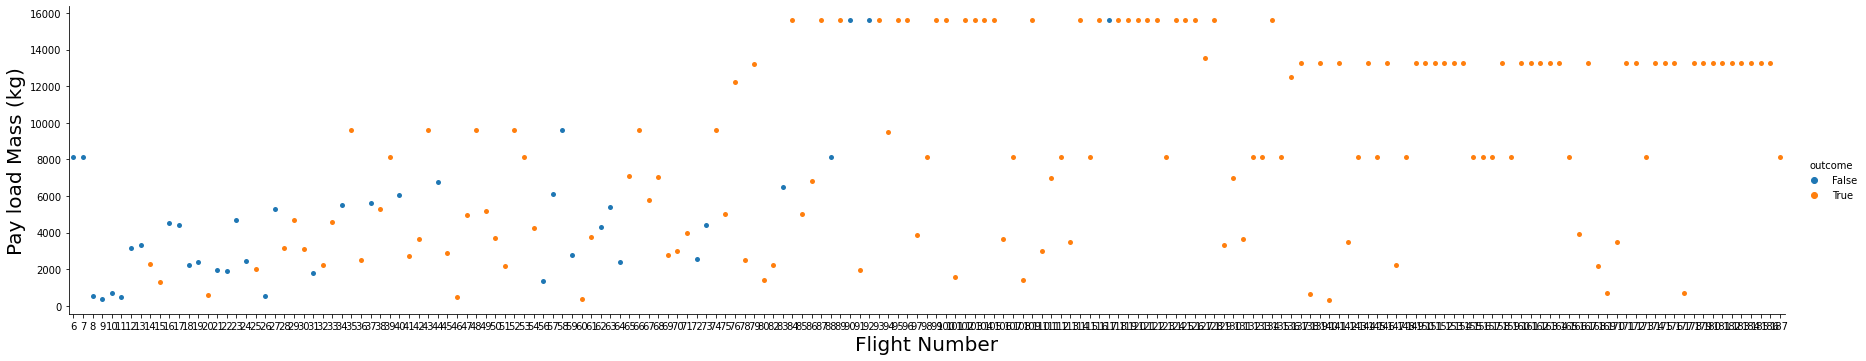

In [106]:
sns.catplot(x="flight no", y="payload mass", hue="outcome", data=df, aspect=5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

2. Relationship between flight number and launch site
* We see that different launch sites have different success rate KSC LC-39A highest success rate 90%, VSFB SLC-4E 82% and CCSFS SLC-40 have most of launch times but lowest success rate 73%

* When flight number reach to 100, most of the landing after that is success, the first 50 flight number have high failure rate

* From beginning, SpaceX launch site was in CCSFS, then from flight number 30 - 50, SpaceX move to launch site VSFB and KSC, only VSFB have 100% success rate at that time. From flight number 130, SpaceX equally divide the number of launches to 3 launch sites

In [107]:
df_launchsite_outcome = df.groupby("launch site").describe(include="all")["outcome"]
df_launchsite_outcome["success rate"] = df_launchsite_outcome["freq"] / df_launchsite_outcome["count"]
df_launchsite_outcome

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,success rate
launch site,,,,,,,,,,,,
CCSFC SLC-40,99,2,True,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.727273
KSC LC-39A,52,2,True,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.903846
VSFB SLC-4E,28,2,True,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.821429


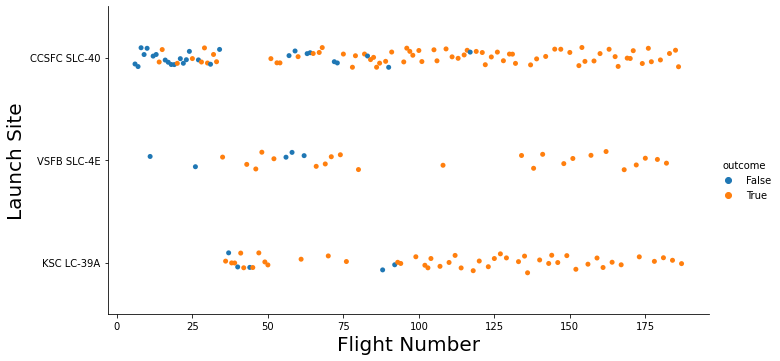

In [108]:
sns.catplot(x="flight no", y="launch site", hue="outcome", data=df, aspect=2)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.show()

3. Relationship between pay load and launch site

* We can see clearly that payload mass divide into 2 categories: low payload mass, which is below 8000 kgs, and high payload mass which is above 8000 kgs

* above 8000kgs: flight launchs are equally divided into 3 launch sites and also have high success rate

* below 8000kgs: flight launchs focus on CCSFS, this site also has the highest failure rate, it is plausible as CCSFS being used for R&D versus the other 2 launch sites used with less failure-tolerant payloads

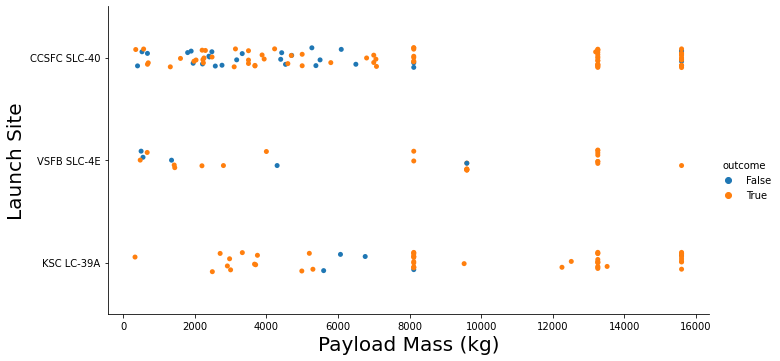

In [109]:
sns.catplot(x="payload mass", y="launch site", hue="outcome", data=df, aspect = 2)
plt.xlabel("Payload Mass (kg)", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.show()

4. Relationship between success rate and orbit type
* We can see that SpaceX focus on VLEO, GTO, ISS, LEO, PO, SSO, MEO; SpaceX also has flights with ES-L1, GEO, HEO, SO, TLI with only 1-2 times launch

* The focused orbit group: VLEO with the most flights also highest success rate 94.8%, then SSO 91.7%, LEO 81.25%, MEO 80%, the lowest are GTO 55.9%

* The less focused orbit group: ES-L1, GEO, HEO, TLI have 100% success rate, SO fails at its first launch

In [110]:
df_orbit_outcome = df.groupby("orbit").describe(include="all")["outcome"]
df_orbit_outcome["success rate"] = df_orbit_outcome["freq"] / df_orbit_outcome["count"] * 100
df_orbit_outcome["success rate"]["SO"] = 0
df_orbit_outcome

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,success rate
orbit,,,,,,,,,,,,
ES-L1,1,1,True,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
GEO,2,1,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
GTO,34,2,True,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.882353
HEO,1,1,True,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
ISS,33,2,True,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.727273
LEO,16,2,True,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.25
MEO,5,2,True,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0
PO,14,2,True,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.428571
SO,1,1,False,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


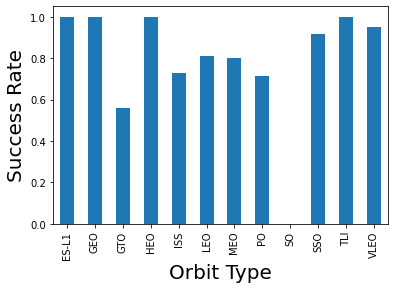

In [111]:
df.groupby("orbit")["outcome"].mean().plot(kind="bar")
plt.xlabel("Orbit Type",fontsize=20)
plt.ylabel("Success Rate",fontsize=20)
plt.show()

5. Relationship between flight number and orbit
* In MEO and LEO orbit, the success appears related to number of flights, on the other hand, there seems to be no relationship between flight number when in GTO and VLEO orbit


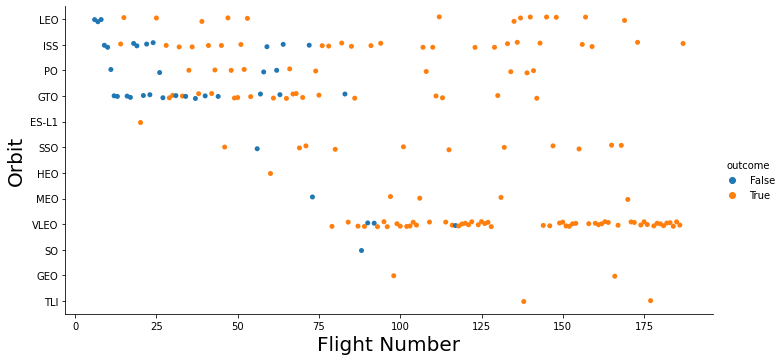

In [112]:
sns.catplot(x="flight no", y="orbit", hue="outcome", data=df, aspect=2)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

6. Relationship between payload and orbit type
* Heavy payload has negative influence on GTO, positive on LEO and ISS, PO

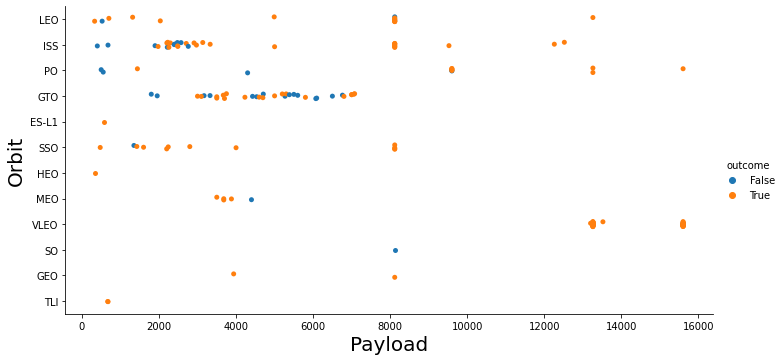

In [113]:
sns.catplot(x="payload mass", y="orbit", hue="outcome", data=df, aspect=2)
plt.xlabel("Payload",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

7. Launch success yearly trend
* The success rate since 2013 kept increasing till 2020

In [114]:
df["year"] = df["date"].map(lambda x: x.split("-")[0])
df["year"].unique()

array(['2010', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022'], dtype=object)

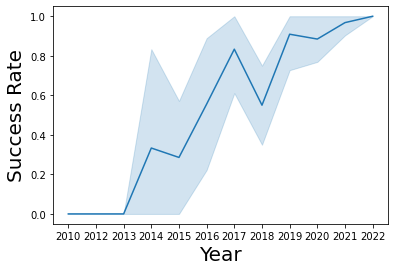

In [115]:
sns.lineplot(x="year", y="outcome", data=df)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Success Rate", fontsize=20)
plt.show()

8. Features Engineering
* Choose the important variable that affect the success rate to predict future module

* Apply one hot encoding to categorical columns

* Cast all numeric columns to `float64`

In [116]:
features = df[["flight no", "payload mass", "orbit", "launch site", "flights", 
               "gridfins", "reused", "legs", "landing pad", "block", "reused count", "serial"]]
features.head()

,flight no,payload mass,orbit,launch site,flights,gridfins,reused,legs,landing pad,block,reused count,serial
0,6,8117.574038,LEO,CCSFC SLC-40,1,False,False,False,NaN,1.0,0,B0003
1,7,8117.574038,LEO,CCSFC SLC-40,1,False,False,False,NaN,1.0,0,B0004
2,8,525.000000,LEO,CCSFC SLC-40,1,False,False,False,NaN,1.0,0,B0005
3,9,400.000000,ISS,CCSFC SLC-40,1,False,False,False,NaN,1.0,0,B0006
4,10,677.000000,ISS,CCSFC SLC-40,1,False,False,False,NaN,1.0,0,B0007


In [117]:
features_ohe = pd.get_dummies(features, columns=["orbit", "launch site", "landing pad", "serial"])
features_ohe.head()

,flight no,payload mass,flights,gridfins,reused,legs,block,reused count,orbit_ES-L1,orbit_GEO,...,serial_B1060,serial_B1061,serial_B1062,serial_B1063,serial_B1067,serial_B1069,serial_B1071,serial_B1072,serial_B1073,serial_B1077
0,6,8117.574038,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,8117.574038,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,400.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
features_ohe = features_ohe.astype('float64')
features_ohe.head()

,flight no,payload mass,flights,gridfins,reused,legs,block,reused count,orbit_ES-L1,orbit_GEO,...,serial_B1060,serial_B1061,serial_B1062,serial_B1063,serial_B1067,serial_B1069,serial_B1071,serial_B1072,serial_B1073,serial_B1077
0,6.0,8117.574038,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.0,8117.574038,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.0,400.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
features_ohe.to_csv("../EDA/features.csv", index=False)